<a href="https://colab.research.google.com/github/krzischp/Functions-complexity/blob/main/Analises_Complexidades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atividade 1**

Abaixo encontra-se a classe Dataset e os datasets gerados que serão usados na Atividade 1. As buscas pedidas na Atividade 1 serão feitas utilizando o método `search` da classe Dataset.

Importante lembrar que o código da classe Dataset não precisa ser alterado. Recomenda-se leitura e entendimento do mesmo.

In [1]:
import time
import random


class Dataset(object):

    def __init__(self, struct_type, size):
        self.struct_type = struct_type
        self.size = size
        self.items = self._generate_dataset()

    @staticmethod
    def generate_cpf():
    
        cpf = [random.randint(0, 9) for x in range(11)]                              
                                      
        # for _ in range(2):                                                          
        #     val = sum([(len(cpf) + 1 - i) * v for i, v in enumerate(cpf)]) % 11      
                                                                                
        #     cpf.append(11 - val if val > 1 else 0)                                  
                                                                                
        return '%s%s%s.%s%s%s.%s%s%s-%s%s' % tuple(cpf)

    def _generate_dataset(self):

        if self.struct_type == 'structure_1':
            return sorted([Dataset.generate_cpf() for n in range(self.size)])

        elif self.struct_type == 'structure_2':
            return {Dataset.generate_cpf(): i for i, _ in enumerate(range(self.size))}
        else:
            raise Exception('struct_type must be "structure_1" or "structure_2"')

    def _function_1(self, value):
        
        found = False
        for item in self.items:

            if item == value:
                found = True
                break

        return found

    def _function_2(self, value):
        
        start, end = 0, len(self.items) - 1

        while start <= end:

            mid = start + (end - start) // 2
            if value > self.items[mid]:
                start = mid + 1
            elif value < self.items[mid]:
                end = mid - 1
            else:
                return mid

        return -1

    def _function_3(self, value):
        return self.items.get(value)

    def search(self, value, search_type):

        if self.struct_type == 'structure_1':

            if search_type == 'function_1':
                self._function_1(value)
            elif search_type == 'function_2':
                self._function_2(value)
            else:
                raise Exception('search_type of Structure1Dataset must be "function_1" or "function_2"')

        elif self.struct_type == 'structure_2':

            if search_type == 'function_3':
                self._function_3(value)
            else:
                raise Exception('search_type of Structure2Dataset must be "function_3"')

                

## *Exemplo de Criação dos Datasets*

O exemplo abaixo será usado para executar **2 tipos de busca**: function_1 e function_2.



In [9]:
structure_1_dataset_10 = Dataset('structure_1', 10)
structure_1_dataset_100 = Dataset('structure_1', 100)
structure_1_dataset_1000 = Dataset('structure_1', 1000)
structure_1_dataset_10000 = Dataset('structure_1', 10000)
structure_1_dataset_100000 = Dataset('structure_1', 100000)
structure_1_dataset_1000000 = Dataset('structure_1', 1000000)

O exemplo abaixo será usado para executar **1 tipo de busca**: function_3


In [10]:
structure_2_dataset_10 = Dataset('structure_2', 10)
structure_2_dataset_100 = Dataset('structure_2', 100)
structure_2_dataset_1000 = Dataset('structure_2', 1000)
structure_2_dataset_10000 = Dataset('structure_2', 10000)
structure_2_dataset_100000 = Dataset('structure_2', 100000)
structure_2_dataset_1000000 = Dataset('structure_2', 1000000)

Cada teste envolverá um tamanho de conjunto de dados e uma função de busca. No mesmo serão realizadas **10000 buscas** por chaves geradas aleatoriamente e o **tempo total do teste** será colocado na tabela da Atividade 1.

As função citadas no enunciado da Atividade 1 são, respectivamente: `function_1`, `function_2` e `function_3`. As buscas `function_1` e `function_2` devem ser executadas em datasets do tipo `structure_1` e buscas do tipo `function_3` devem ser executadas em datasets do tipo `structure_2`.

Abaixo está o código para preenchimento da primeira linha da tabela:

In [13]:
def search(dataset, search_type):

    # número de buscas, não mexer neste parâmetro
    search_batch = 10_000

    # gerando CPFs aleatórios para busca
    cpf_to_search = [Dataset.generate_cpf() for _ in range(search_batch)]

    start = time.time()
    for i in range(search_batch): # buscando
        dataset.search(cpf_to_search[i], search_type)
    
    return time.time() - start


# structure_1_dataset_function_1_time = search(structure_1_dataset_10, 'function_1')
# structure_1_dataset_function_2_time = search(structure_1_dataset_10, 'function_2')
# structure_2_dataset_function_3_time = search(structure_2_dataset_10, 'function_3')

# structure_1_dataset_function_1_time = search(structure_1_dataset_100, 'function_1')
# structure_1_dataset_function_2_time = search(structure_1_dataset_100, 'function_2')
# structure_2_dataset_function_3_time = search(structure_2_dataset_100, 'function_3')

# structure_1_dataset_function_1_time = search(structure_1_dataset_1000, 'function_1')
# structure_1_dataset_function_2_time = search(structure_1_dataset_1000, 'function_2')
# structure_2_dataset_function_3_time = search(structure_2_dataset_1000, 'function_3')

# structure_1_dataset_function_1_time = search(structure_1_dataset_10000, 'function_1')
# structure_1_dataset_function_2_time = search(structure_1_dataset_10000, 'function_2')
# structure_2_dataset_function_3_time = search(structure_2_dataset_10000, 'function_3')

# structure_1_dataset_function_1_time = search(structure_1_dataset_100000, 'function_1')
# structure_1_dataset_function_2_time = search(structure_1_dataset_100000, 'function_2')
# structure_2_dataset_function_3_time = search(structure_2_dataset_100000, 'function_3')

structure_1_dataset_function_1_time = search(structure_1_dataset_1000000, 'function_1')
structure_1_dataset_function_2_time = search(structure_1_dataset_1000000, 'function_2')
structure_2_dataset_function_3_time = search(structure_2_dataset_1000000, 'function_3')

print(structure_1_dataset_function_1_time,
      structure_1_dataset_function_2_time,
      structure_2_dataset_function_3_time)

1755.4608273506165 0.09467124938964844 0.007468700408935547


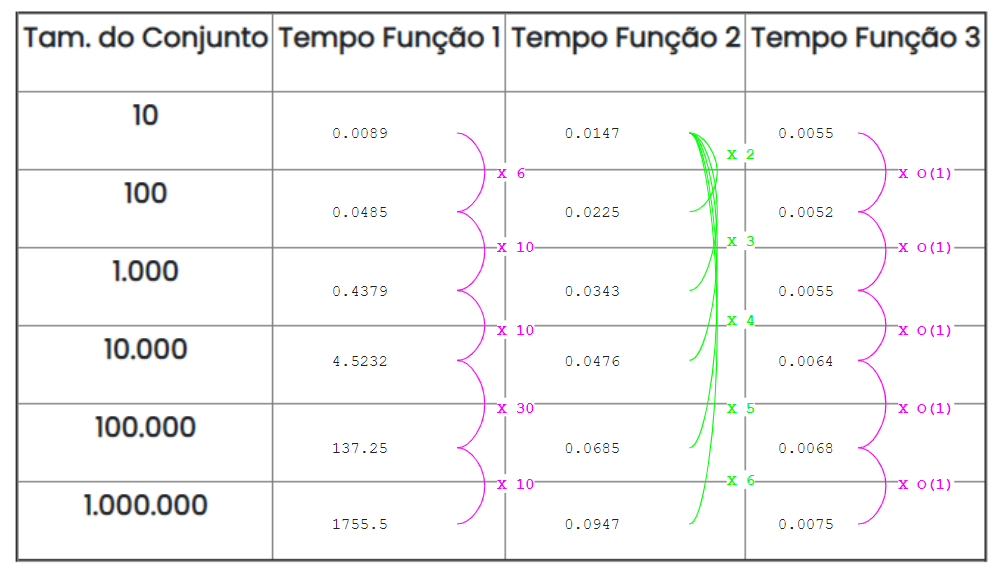

## **Qual funçao matematica descreve a eficiencia de cada funçao de busca?**

**Analisa da primeira coluna: Funçao 1**:
- O tempo de execuçao multiplica por 10 exceto entre **n** = 10 e **n** = 100 (multiplica por 6) assim que entre **n** = 10000 e **n** = 100000 (multiplica por 30). Alem dessas 2 exceçoes, a complexidade da **Funçao 1** parece ser linear.

**Analisa da segunda coluna: Funçao 2**:
- Ao ver os resultados da tabela, podemos inferir que a complexidade parece ser logaritmica:


$t = \log_b 10$

$\Rightarrow$
$\log_b 100 = 2\log_b 10 = 2t$

$\Rightarrow$
$\log_b 1000 = 3\log_b 10 = 3t$

etc.


**Analisa da terceira coluna: Funçao 3**:
- Ao ver os resultados da tabela, podemos inferir que a complexidade parece ser constante: o tempo de execuçao quase nao evolui ao multiplicar o tamanho do *dataset* por 10 cada vez. 


# **E consegue especular qual estrutura de dados esta implementada em cada funçao?**

- **Funçao 1**: a busca dessa funçao se aparente a uma busca em uma estrutura de **lista**. A busca é linear: incrementa o indice até achar o valor desejado.
- **Funçao 2**: a busca dessa funçao é **binaria** em um *array* ordenado: compara o valor ao elemento do meio de um *array* ordenado e sempre reitera do lado direito caso o valor for maior e na isquerda caso o valor for menor. `_generate_dataset` ordena a lista dos cpfs no contexto do `'structure_1'`.
- **Funçao 3**: a busca dessa funçao é a funçao de busca no dicionario em *Python* que é de complexidade constante quando o valor buscado é a chave. E o caso aqui.